In [20]:
%%capture
! pip install seaborn
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
#from sklearn.ensemble import ExtraTreesClassifier
%matplotlib inline 

In [21]:
#lb_style = LabelBinarizer()
lb_make = LabelEncoder()
lm = LinearRegression()
#model = ExtraTreesClassifier()

In [22]:
train_features_df = pd.read_csv("train_features.csv")
train_target_df = pd.read_csv("train_salaries.csv")

In [13]:
train_features_df.head()



,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [14]:
train_target_df.head()

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163


In [23]:
train_merge = pd.merge(train_features_df, train_target_df, on='jobId')

In [21]:
print(train_merge.describe() )
print()
print(train_merge.describe(include=['object']))
print()
print("Count of NaNs: ", train_merge.isnull().sum().sum())

       yearsExperience  milesFromMetropolis          salary
count   1000000.000000       1000000.000000  1000000.000000
mean         11.992386            49.529260      116.061818
std           7.212391            28.877733       38.717936
min           0.000000             0.000000        0.000000
25%           6.000000            25.000000       88.000000
50%          12.000000            50.000000      114.000000
75%          18.000000            75.000000      141.000000
max          24.000000            99.000000      301.000000

                   jobId companyId  jobType       degree    major industry
count            1000000   1000000  1000000      1000000  1000000  1000000
unique           1000000        63        8            5        9        7
top     JOB1362684879526    COMP39   SENIOR  HIGH_SCHOOL     NONE      WEB
freq                   1     16193   125886       236976   532355   143206

Count of NaNs:  0


In [24]:
train_merge = train_merge[train_merge.salary != 0]

In [12]:
#train_merge_cat_hot_enc = train_merge
#train_merge_cat_hot_enc = pd.get_dummies(train_merge_cat_splt, columns=['jobType'])
#train_merge_cat_hot_enc = pd.get_dummies(train_merge_cat_splt, columns=['degree'])
#train_merge_cat_hot_enc = pd.get_dummies(train_merge_cat_splt, columns=['major'])
#train_merge_cat_hot_enc = pd.get_dummies(train_merge_cat_splt, columns=['industry'])
#train_merge_cat_hot_enc.head()

In [149]:
#jobType = pd.get_dummies(train_merge["jobType"])
#degree = pd.get_dummies(train_merge["degree"])
#major = pd.get_dummies(train_merge["major"])
#industry = pd.get_dummies(train_merge["industry"])
#print(jobType.head())
#print()
#print(degree.head())
#print()
#print(major.head())
#print()
#print(industry.head())

In [13]:
#train_merge_cat_hot_enc.corr()

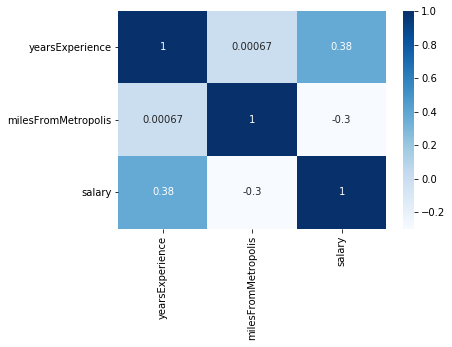

In [26]:
#https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e
train_merge_corr_indx = train_merge.corr().index
plt.figure(figsize=(6,4))
#plot heat map
g=sns.heatmap(train_merge[train_merge_corr_indx].corr(),annot=True,cmap="Blues")

In [28]:
# grouping by Job type
train_merge_grp_jb = train_merge[['jobType','salary']]
train_merge_grp_jb1 = train_merge_grp_jb.groupby(['jobType'],as_index=False).\
    mean().sort_values(by='salary',ascending=False)
train_merge_grp_jb1

,jobType,salary
0,CEO,145.311425
2,CTO,135.481067
1,CFO,135.458547
7,VICE_PRESIDENT,125.368630
5,MANAGER,115.368518
6,SENIOR,105.487775
4,JUNIOR,95.333087
3,JANITOR,70.813045


In [29]:
# grouping by Industry
train_merge_grp_jb = train_merge[['industry','salary']]
train_merge_grp_jb1 = train_merge_grp_jb.groupby(['industry'],as_index=False).\
    mean().sort_values(by='salary',ascending=False)
train_merge_grp_jb1

,industry,salary
4,OIL,130.953863
2,FINANCE,130.747659
6,WEB,121.645362
3,HEALTH,115.735540
0,AUTO,109.435222
5,SERVICE,104.446820
1,EDUCATION,99.448386


In [30]:
# grouping by degree
train_merge_grp_jb = train_merge[['degree','salary']]
train_merge_grp_jb1 = train_merge_grp_jb.groupby(['degree'],as_index=False).\
    mean().sort_values(by='salary',ascending=False)
train_merge_grp_jb1

,degree,salary
1,DOCTORAL,135.490979
3,MASTERS,130.505647
0,BACHELORS,125.454663
2,HIGH_SCHOOL,101.921085
4,NONE,98.176882


In [32]:
# grouping by major
train_merge_grp_jb = train_merge[['major','salary']]
train_merge_grp_jb1 = train_merge_grp_jb.groupby(['major'],as_index=False).\
    mean().sort_values(by='salary',ascending=False)
train_merge_grp_jb1

,major,salary
4,ENGINEERING,138.441342
1,BUSINESS,135.648980
6,MATH,133.322042
3,COMPSCI,132.075605
8,PHYSICS,130.372436
2,CHEMISTRY,129.072085
0,BIOLOGY,127.932664
5,LITERATURE,124.423097
7,NONE,102.583864


In [33]:
# grouping by major
train_merge_grp_jb = train_merge[['major', 'industry','jobType','degree','salary']]
train_merge_grp_jb1 = train_merge_grp_jb.groupby(['major', 'industry','jobType','degree'],as_index=False).\
    mean().sort_values(by='salary',ascending=False)
train_merge_grp_jb1

,major,industry,jobType,degree,salary
673,ENGINEERING,OIL,CEO,DOCTORAL,194.192020
674,ENGINEERING,OIL,CEO,MASTERS,188.123656
190,BUSINESS,FINANCE,CEO,DOCTORAL,187.762887
191,BUSINESS,FINANCE,CEO,MASTERS,185.979695
676,ENGINEERING,OIL,CFO,DOCTORAL,184.570000
...,...,...,...,...,...
1045,NONE,AUTO,JANITOR,NONE,64.588690
1230,NONE,SERVICE,JANITOR,NONE,60.272627
1229,NONE,SERVICE,JANITOR,HIGH_SCHOOL,60.135277
1081,NONE,EDUCATION,JANITOR,HIGH_SCHOOL,55.396100


In [27]:
# https://pbpython.com/categorical-encoding.html
train_merge_lbl_enc = train_merge
train_merge_lbl_enc["jobType_code"] = lb_make.fit_transform(train_merge["jobType"])
train_merge_lbl_enc["degree_code"] = lb_make.fit_transform(train_merge["degree"])
train_merge_lbl_enc["major_code"] = lb_make.fit_transform(train_merge["major"])
train_merge_lbl_enc["industry_code"] = lb_make.fit_transform(train_merge["industry"])
train_merge_lbl_enc.head(10)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary,jobType_code,degree_code,major_code,industry_code
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130,1,3,6,3
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101,0,2,7,6
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137,7,1,8,3
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142,5,1,2,0
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163,7,0,8,2
5,JOB1362684407692,COMP15,MANAGER,DOCTORAL,COMPSCI,FINANCE,2,31,113,5,1,3,2
6,JOB1362684407693,COMP15,CFO,NONE,NONE,HEALTH,23,24,178,1,4,7,3
7,JOB1362684407694,COMP24,JUNIOR,BACHELORS,CHEMISTRY,EDUCATION,9,70,73,4,0,2,1
8,JOB1362684407695,COMP20,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,1,54,31,3,2,7,1
9,JOB1362684407696,COMP41,VICE_PRESIDENT,BACHELORS,CHEMISTRY,AUTO,17,68,104,7,0,2,0


In [15]:
train_merge_lbl_enc_corr = train_merge_lbl_enc.corr()
train_merge_lbl_enc_corr

,yearsExperience,milesFromMetropolis,salary,jobType_code,degree_code,major_code,industry_code
yearsExperience,1.000000,0.000672,0.375013,-0.000185,-0.000140,0.000013,0.000264
milesFromMetropolis,0.000672,1.000000,-0.297686,-0.000362,-0.001360,-0.001369,-0.000820
salary,0.375013,-0.297686,1.000000,-0.228672,-0.231794,-0.262435,0.086500
jobType_code,-0.000185,-0.000362,-0.228672,1.000000,-0.020084,-0.020773,0.000066
degree_code,-0.000140,-0.001360,-0.231794,-0.020084,1.000000,0.370090,0.001548
major_code,0.000013,-0.001369,-0.262435,-0.020773,0.370090,1.000000,0.001077
industry_code,0.000264,-0.000820,0.086500,0.000066,0.001548,0.001077,1.000000


In [28]:
print(pd.unique(train_merge_cat[['jobType_code','jobType']].values.ravel('K')))
print()

print(train_merge_cat[['jobType_code','jobType']].nunique())

[1 0 7 5 4 3 2 6 'CFO' 'CEO' 'VICE_PRESIDENT' 'MANAGER' 'JUNIOR' 'JANITOR'
 'CTO' 'SENIOR']

jobType_code    8
jobType         8
dtype: int64


UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

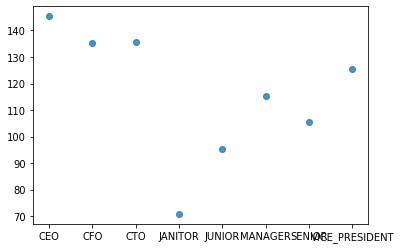

In [39]:
sns.regplot(x="jobType", y="salary", data=train_merge_grp_jb1)
plt.ylim(0,)

In [ ]:
train_merge_grp_jb_corr_indx = train_merge_grp_jb_corr.index
plt.figure(figsize=(10,8))
#plot heat map
g=sns.heatmap(train_merge_grp_jb1[train_merge_grp_jb_corr_indx].corr(),annot=True,cmap="Blues")

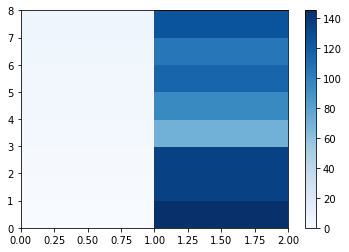

In [21]:
# grouping results
df_gptest = train_merge_cat[['jobType_code','salary']]
grouped_test1 = df_gptest.groupby(['jobType_code'],as_index=False).mean()
grouped_test1
plt.pcolor(grouped_test1, cmap='Blues')
plt.colorbar()
plt.show()

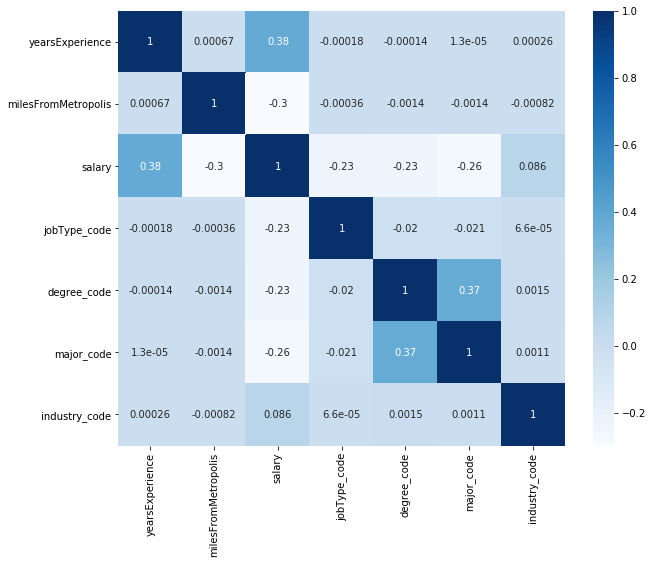

In [18]:
#https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e
top_corr_features = train_merge_cat_corr.index
plt.figure(figsize=(10,8))
#plot heat map
g=sns.heatmap(train_merge_cat[top_corr_features].corr(),annot=True,cmap="Blues")

In [197]:
#https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e
x = train_merge_cat[['yearsExperience','milesFromMetropolis','jobType_code','degree_code','major_code','industry_code']]
y = train_merge_cat['salary']
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(6,'Score'))  #print 10 best features

                 Specs         Score
1  milesFromMetropolis  1.509650e+06
0      yearsExperience  6.162641e+05
2         jobType_code  1.085835e+05
4           major_code  7.759412e+04
3          degree_code  5.651490e+04
5        industry_code  1.122813e+04


In [ ]:
#x = train_merge_cat[['yearsExperience','milesFromMetropolis','jobType_code','degree_code','major_code','industry_code']]
#y = train_merge_cat['salary']
#model.fit(x,y)
##print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
##plot graph of feature importances for better visualization
#feat_importances = pd.Series(model.feature_importances_, index=x.columns)
#feat_importances.nlargest(3).plot(kind='barh')
#plt.show()

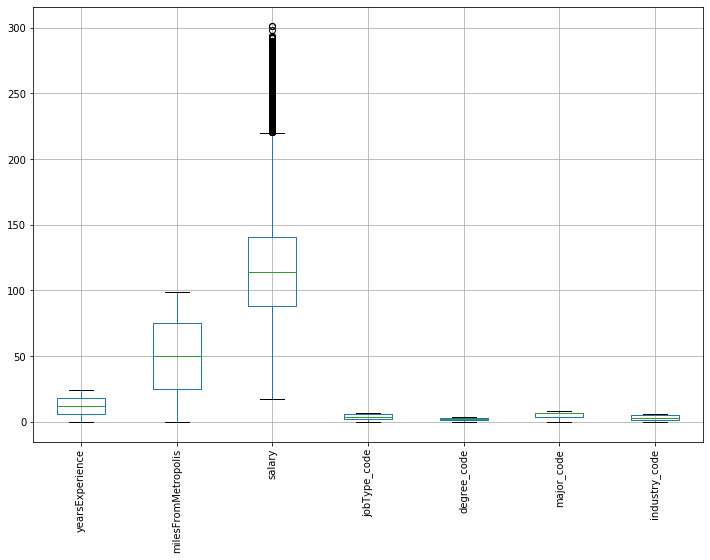

In [171]:
train_merge_cat.boxplot( rot =90, figsize=(12,8))

(0, 315.2166942604856)

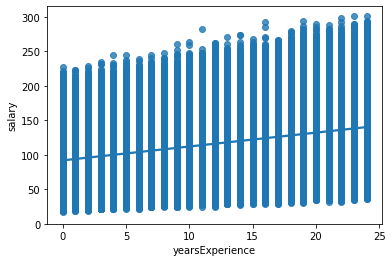

In [169]:
sns.regplot(x="yearsExperience", y="salary", data=train_merge_cat)
plt.ylim(0,)

(0, 315.2166942604856)

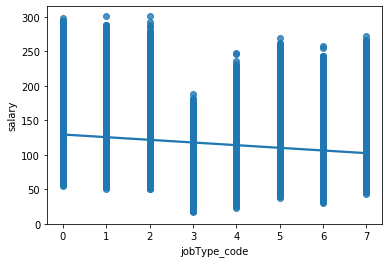

In [159]:
sns.regplot(x="jobType_code", y="salary", data=train_merge_cat)
plt.ylim(0,)

(0, 315.2166942604856)

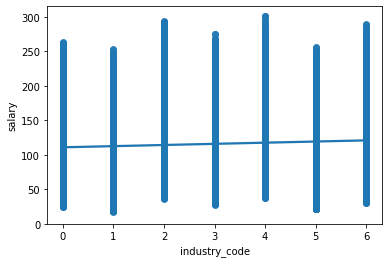

In [160]:
sns.regplot(x="industry_code", y="salary", data=train_merge_cat)
plt.ylim(0,)

(0, 315.2166942604856)

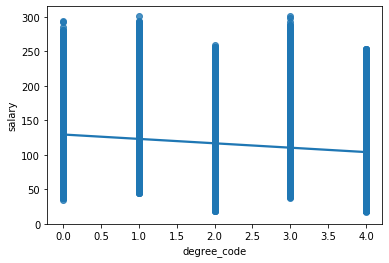

In [161]:
sns.regplot(x="degree_code", y="salary", data=train_merge_cat)
plt.ylim(0,)

(0, 315.2166942604856)

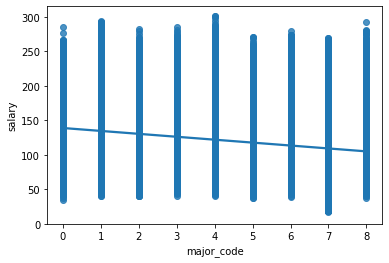

In [162]:
sns.regplot(x="major_code", y="salary", data=train_merge_cat)
plt.ylim(0,)

(0, 315.2166942604856)

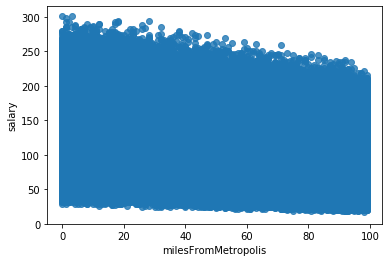

In [192]:
sns.regplot(x="milesFromMetropolis", y="salary", data=train_merge_cat)
plt.ylim(0,)

In [190]:
x = train_merge_cat[['yearsExperience','milesFromMetropolis','jobType_code','degree_code','major_code','industry_code']]
y = train_merge_cat['salary']
lm.fit(x,y)
Yhat=lm.predict(x)
Yhat[0:5]  

array([119.45857562, 110.04295388,  87.09084174, 111.83828989,
        81.38738291])

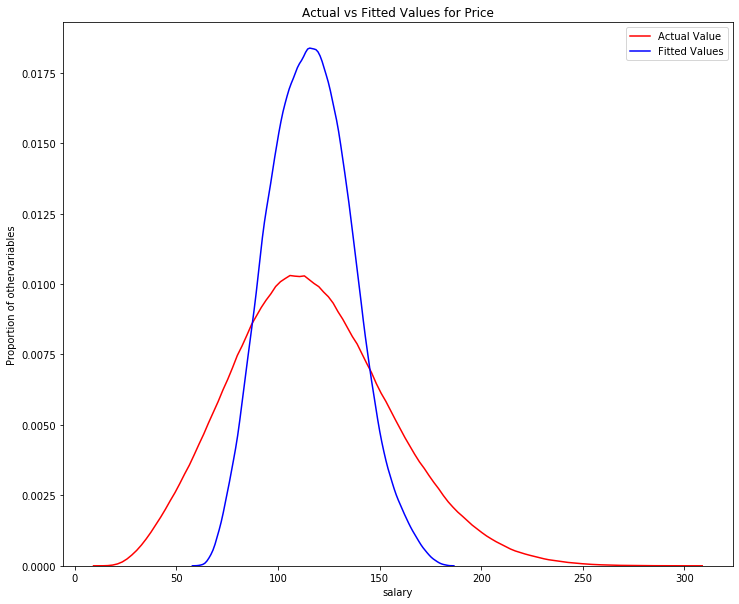

In [191]:
plt.figure(figsize=(12, 10))
ax1 = sns.distplot(train_merge_cat['salary'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('salary')
plt.ylabel('Proportion of othervariables')

plt.show()
plt.close()